<a href="https://colab.research.google.com/github/adamwatts112358/Python-Notebooks/blob/master/SlowSpill.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
% reset -f
from IPython.display import HTML
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [0]:
# Animation options: https://stackoverflow.com/questions/35532498/animation-in-ipython-notebook

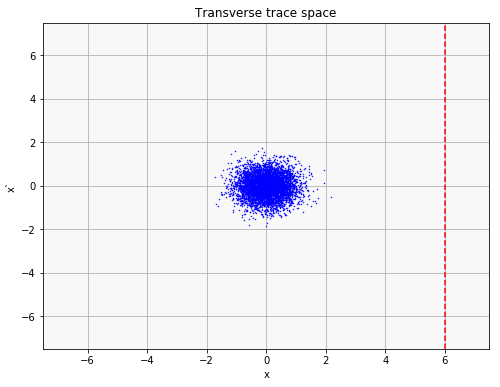

In [0]:
nturns = 420000
skip = 10000 # i.e. make a frame of the animation every "skip" turns
nparticles = 5000
sigma = 0.5 # initial standard deviation in beam x and x'

x = np.random.normal(0.0,sigma,nparticles)
xp = np.random.normal(0.0,sigma,nparticles)

Q0 = 0.490 # initial tune
koct = 0.00001
mu = 0.01*koct # amplitude-dependent tune-shift
khquad = 0.02
dQ = 0.0

sep_pos = 6.0

fig = plt.figure(figsize=(8,6))
plt.title('Transverse trace space')
lt, = plt.plot([], [], "bo", markersize = 0.5)
plt.gca().set_facecolor("#F8F8F8")
plt.xlim(-15*sigma,15*sigma)
plt.ylim(-15*sigma,15*sigma)
plt.xlabel('x')
plt.ylabel('x`')
plt.axvline(x=sep_pos, color='r', linestyle='--')
plt.grid()

def init_func():
  lt.set_data([x],[xp])
  return lt,

def animate(n):
  global x,xp,Q0,dQ,mu,khquad,koct
  
  for i in range(skip):
    Q = Q0+dQ+mu*(x**2+xp**2)
    Q0=Q
    xnew = np.cos(2*np.pi*Q)*x +np.sin(2*np.pi*Q)*(xp - khquad*x - koct*x**3)
    xpnew = -np.sin(2*np.pi*Q)*x + np.cos(2*np.pi*Q)*(xp - khquad*x -  koct*x**3)
    x = xnew
    xp = xpnew

    index_array = np.where(x>sep_pos)[0]    
    x = np.delete(x,index_array)
    xp = np.delete(xp,index_array)
    Q0 = np.delete(Q0,index_array)
  
  lt.set_data(x,xp)
  return lt,
      
myAnimation = animation.FuncAnimation(fig, animate, frames=int(nturns/skip), \
                                      init_func=init_func, interval=100, \
                                      blit=True, repeat=True)

In [0]:
HTML(myAnimation.to_html5_video())